In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('KNN_Project_Data')
df.head()

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0  1636.670614   817.988525  2565.995189  358.347163   550.417491   
1  1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2  1300.035501   820.518697  2025.854469  525.562292   922.206261   
3  1059.347542  1066.866418   612.000041  480.827789   419.467495   
4  1018.340526  1313.679056   950.622661  724.742174   843.065903   

          HYKR         EDFS        GUUB         MGJM         JHZC  \
0  1618.870897  2147.641254  330.727893  1494.878631   845.136088   
1  2084.107872   853.404981  447.157619  1193.032521   861.081809   
2  2552.355407   818.676686  845.491492  1968.367513  1647.186291   
3   685.666983   852.867810  341.664784  1154.391368  1450.935357   
4  1370.554164   905.469453  658.118202   539.459350  1899.850792   

   TARGET CLASS  
0             0  
1             1  
2             1  
3             0  
4             0

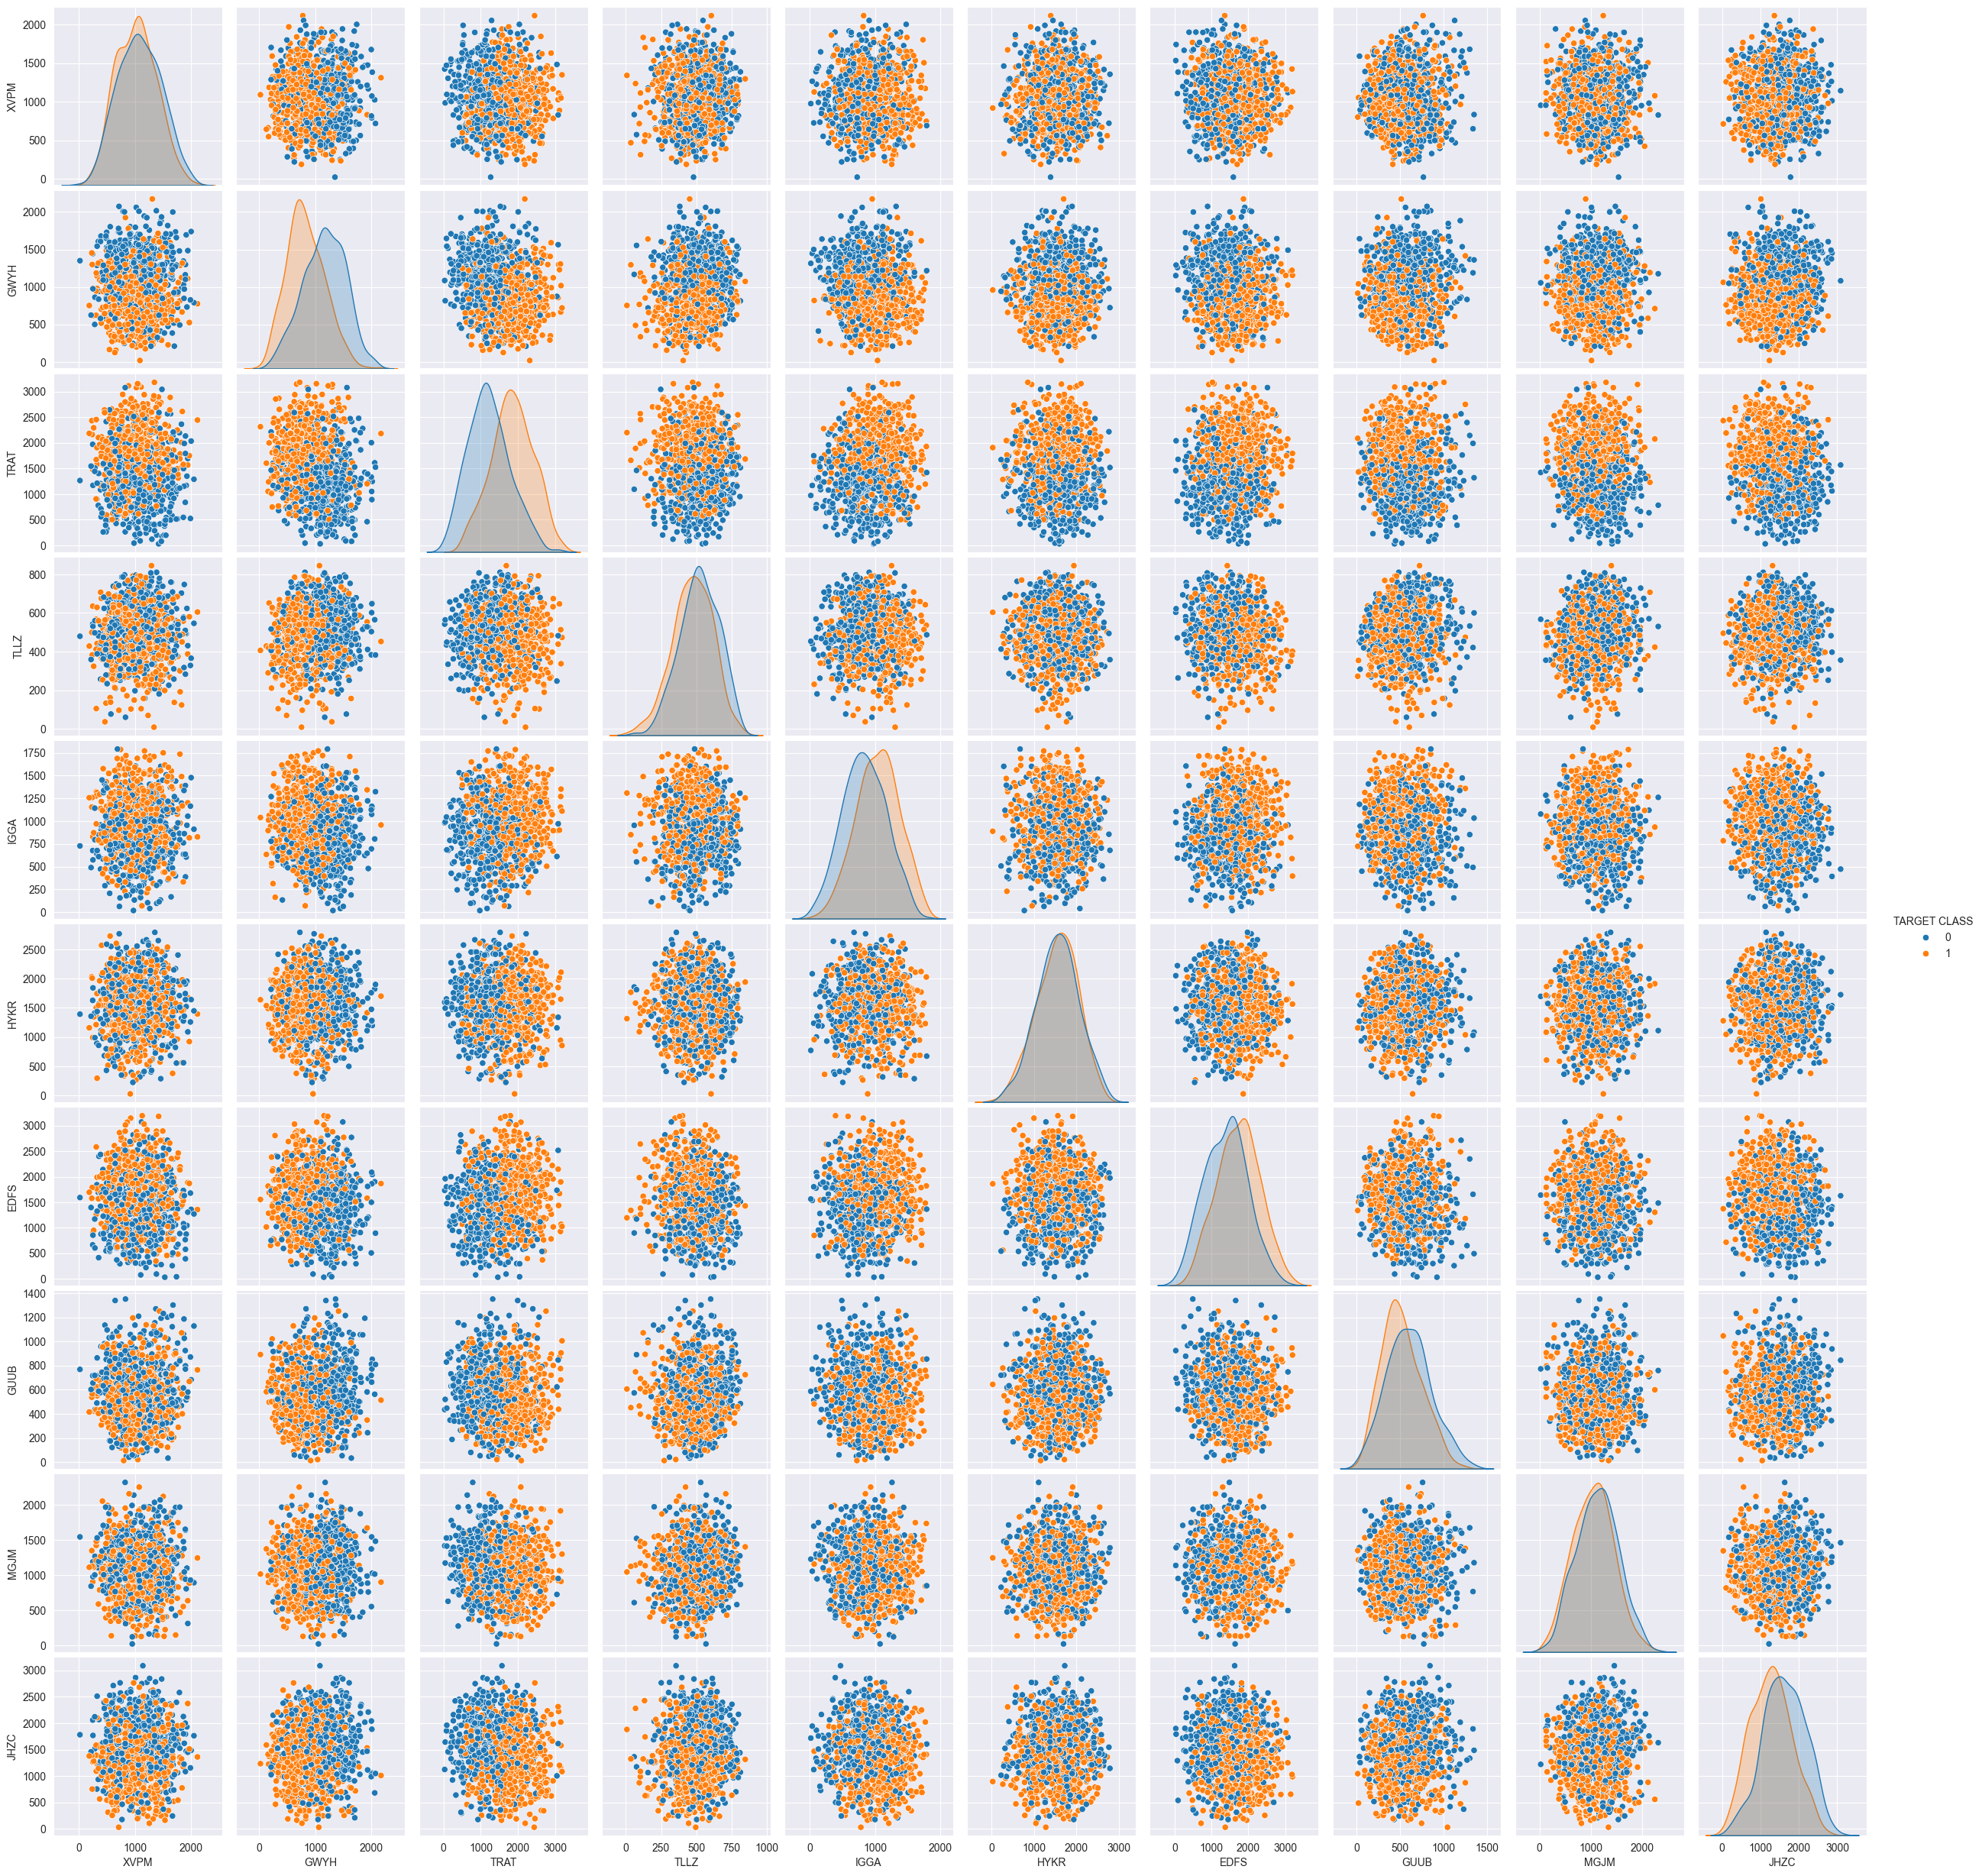

In [36]:
sns.pairplot(df, hue='TARGET CLASS')

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [39]:
scaler_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [40]:
df_scalers = pd.DataFrame(scaler_features, columns=df.columns[:-1])
df_scalers.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [42]:
X = df_scalers
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)

In [44]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
pred = knn.predict(X_test)

In [46]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[109  43]
 [ 41 107]]


              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



In [55]:
error_rate = []

for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

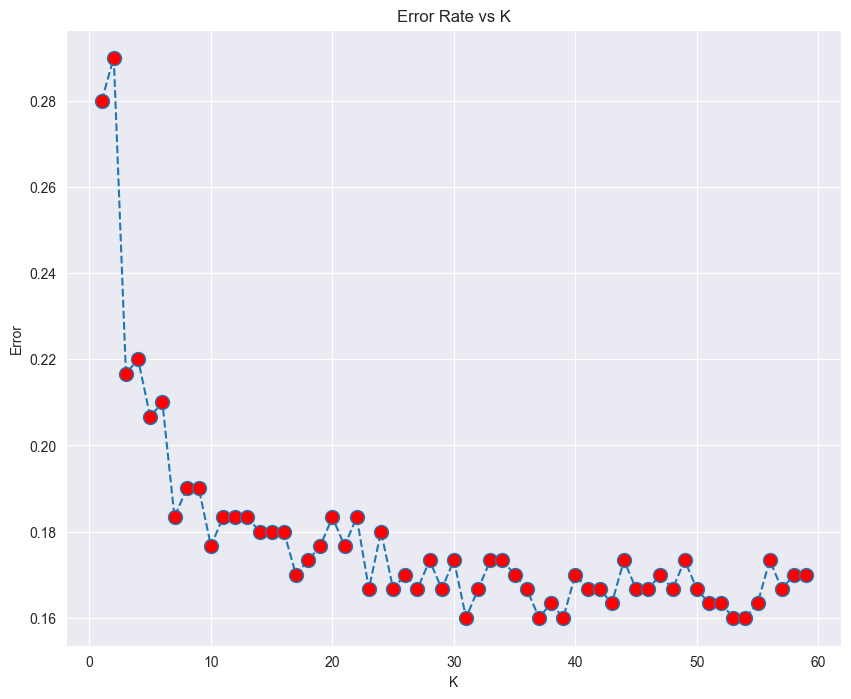

In [56]:

plt.figure(figsize=(10,8))
plt.plot(range(1,60), error_rate, label='Error', marker='o', markerfacecolor='red', ls='--', markersize=10)
plt.title("Error Rate vs K")
plt.xlabel("K")
plt.ylabel("Error")
plt.tight_layout

In [58]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[123  29]
 [ 19 129]]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

